A) plot data using coordinate

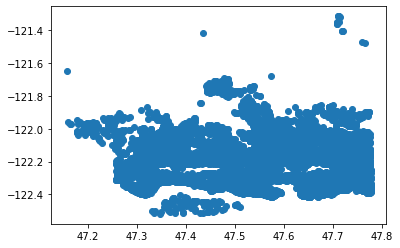

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('p2_dataset/data2_house_data.csv')
lat, long = data['lat'], data['long']

plt.scatter(lat, long)
plt.show()

B) correlation

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.6

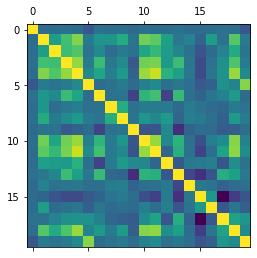

In [4]:
print(data.corr())
plt.matshow(data.corr())
plt.show()

If the correlation between two features is close to 1 or -1 we can drop one because is means we can find one feature using the other one 
bathroom-sqft_living:0.75 
sqft_livin-grade:0.76
sqft_livin-sqft_above:0.87
sqft_living-sqft_living15:0.75

sqft_lot-sqft_lot15:0.71
grade-sqft_above:0.75 
grade-sqft_livin15:0.71

In [5]:
data = data.drop(columns=['sqft_above'])
data = data.drop(columns=['sqft_living15'])
data = data.drop(columns=['sqft_lot15'])
data = data.drop(columns=['sqft_living'])

In [7]:
y = data['price']
x = data.drop(columns=['price'])

In [74]:
print(x.info())
# print(x['date'])
x = x.drop(columns=['id', 'date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_lot       21613 non-null  int64  
 3   floors         21613 non-null  float64
 4   waterfront     21613 non-null  int64  
 5   view           21613 non-null  int64  
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  yr_renovated   21613 non-null  int64  
 11  zipcode        21613 non-null  int64  
 12  lat            21613 non-null  float64
 13  long           21613 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 2.3 MB
None


KeyError: "['id'] not found in axis"

We must normalize cause the range of columns vary alot and the column with big numbers lead to nan

In [81]:
print(x.info())
x=(x-x.mean())/x.std()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_lot       21613 non-null  int64  
 3   floors         21613 non-null  float64
 4   waterfront     21613 non-null  int64  
 5   view           21613 non-null  int64  
 6   condition      21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
 9   yr_built       21613 non-null  int64  
 10  yr_renovated   21613 non-null  int64  
 11  zipcode        21613 non-null  int64  
 12  lat            21613 non-null  float64
 13  long           21613 non-null  float64
dtypes: float64(4), int64(10)
memory usage: 2.3 MB
None


In [91]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

class regression:
    def __init__(self, degree: int, learning_rate: float):
        self.degree = degree
        self.learning_rate = learning_rate
    
    def initialization(self, x):
        features_num = x.shape[1]
        
        # plus 1 is for considering bias
        self.coefficients = np.random.random((self.degree * features_num) + 1)
        
        for i in range(self.degree-1):
            x = np.c_[x, np.multiply(x[:, 0:features_num], x[:, i*features_num:(i+1)*features_num])]
            
        x = np.c_[np.ones(len(x)), x]
        
        return x

    # In a general form features should be a list of features
    def train_gradient_descent(self, x: np.array, y: np.array, iteration: int):
        x = self.initialization(x)
        
        for i in range(iteration):
            self.gradient_descent(x, y)
    
    def gradient_descent(self, x, y):
        m = len(x)
        prediction = x.dot(self.coefficients)
        self.coefficients -= self.learning_rate * 1/m * (x.T.dot(prediction - y))
    
    def predict(self, x):
        x = self.initialization(x)
        
        return x.dot(self.coefficients)
    
    def normal_equation(self, x, y, lam: float):
        features_num = x.shape[1]
        x = self.initialization(x)
        mat = np.eye((self.degree * features_num) + 1)
        mat[0][0] = 0
        self.coefficients = np.linalg.inv(x.T.dot(x) + lam * mat).dot(x.T.dot(y))
    
    def track_learning(self, X_train, X_test, y_train, y_test, iteration: int, step: int):
        steps = np.array([0])
        train_error_mse = np.array([])
        test_error_mse = np.array([])
        
        train_error_mae = np.array([])
        test_error_mae = np.array([])
        
        train_error_rmse = np.array([])
        test_error_rmse = np.array([])
        
        while iteration > step:
            self.train_gradient_descent(X_train, y_train, step)
            
            steps = np.append(steps, steps[len(steps) - 1] + step)
            
            y_train_predicted = self.predict(X_train)
            train_error_mse = np.append(train_error_mse, mean_squared_error(y_train, y_train_predicted))
            train_error_mae = np.append(train_error_mae, mean_absolute_error(y_train, y_train_predicted))
            train_error_rmse = np.append(train_error_rmse, sqrt(mean_squared_error(y_train, y_train_predicted)))  
            
            y_test_predicted = self.predict(X_test)
            test_error_mse = np.append(test_error_mse, mean_squared_error(y_test, y_test_predicted))
            test_error_mae = np.append(test_error_mae, mean_absolute_error(y_test, y_test_predicted))
            test_error_rmse = np.append(test_error_rmse, sqrt(mean_squared_error(y_test, y_test_predicted)))
                                         
            iteration -= step
            
        self.train_gradient_descent(X_train, y_train, iteration)
        
        y_train_predicted = self.predict(X_train)
        train_error_mse = np.append(train_error_mse, mean_squared_error(y_train, y_train_predicted))
        train_error_mae = np.append(train_error_mae, mean_absolute_error(y_train, y_train_predicted))
        train_error_rmse = np.append(train_error_rmse, sqrt(mean_squared_error(y_train, y_train_predicted)))
                                     
        y_test_predicted = self.predict(X_test)
        test_error_mse = np.append(test_error_mse, mean_squared_error(y_test, y_test_predicted))
        test_error_mae = np.append(test_error_mae, mean_absolute_error(y_test, y_test_predicted))
        test_error_rmse = np.append(test_error_rmse, sqrt(mean_squared_error(y_test, y_test_predicted)))
                                    
        plt.scatter(steps, train_error_mse, c='blue')
        plt.scatter(steps, test_error_mse, c='red')
        plt.title('mean squared error')
        plt.xlabel('steps')
        plt.ylabel('error')
        plt.show()
        
        plt.scatter(steps, train_error_mae, c='blue')
        plt.scatter(steps, test_error_mae, c='red')
        plt.title('mean absolute error')
        plt.xlabel('steps')
        plt.ylabel('error')
        plt.show()
                                    
        plt.scatter(steps, train_error_rmse, c='blue')
        plt.scatter(steps, test_error_rmse, c='red')
        plt.title('root mean squared error')
        plt.xlabel('steps')
        plt.ylabel('error')
        plt.show()

In [92]:
reg = regression(1, 0.1)
reg.train_gradient_descent(np.array(x), np.array(y), 100)
print(reg.coefficients)
# plt.scatter(X_train, y_train, c='blue')
# plt.scatter(X_test, new_reg.predict(np.array(X_test)), c='red')
# plt.show()

[540073.79629622    878.33308408  75512.02994994   8952.02591354
  16590.35959963  53044.09142496  48070.18737316  14498.68414902
 194675.37800732  27688.0042718  -94343.94455395   6903.93834803
 -33284.69218693  79998.22864322  -9195.73152887]


In [94]:
reg = regression(2, 0.1)
reg.normal_equation(np.array(x), np.array(y), 0)
print(reg.coefficients)

[ 2.40640000e+05  1.24112898e+04  4.62562568e+04  1.32201251e+04
  1.56317751e+04  1.96608000e+05  3.06345329e+04  2.70093959e+04
  1.52351664e+05  1.32467384e+04 -4.52563806e+04 -1.13383095e+06
 -5.07883920e+04  7.46587270e+04 -2.28922956e+04 -5.73219303e+02
  2.14916506e+04 -3.22778813e+02 -5.36351776e+03 -1.17760000e+04
  3.25633046e+03  1.71072331e+02  3.69636420e+04  1.00002918e+04
  1.75873506e+04  2.52400953e+05  1.28924390e+04 -3.54058156e+04
 -1.52000989e+03]
